In [1]:
!pip install pandas matplotlib tensorflow
import json
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
import matplotlib.pyplot as plt
df = pd.read_csv("Tweets.csv")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
review_df = df[['text','airline_sentiment']]
print(review_df.shape)
review_df.head(5)

df.columns

(14640, 2)


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [3]:
review_df = review_df[review_df['airline_sentiment'] != 'neutral']
print(review_df.shape)
review_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [4]:
review_df["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [5]:
sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [6]:
tweet = review_df.text.values

In [7]:

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1

In [8]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [9]:

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
__________________________________________________

In [10]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 51s 167ms/step - loss: 0.3960 - accuracy: 0.8324 - val_loss: 0.2145 - val_accuracy: 0.9151
Epoch 2/5
289/289 [==============================] - 48s 165ms/step - loss: 0.2231 - accuracy: 0.9162 - val_loss: 0.1696 - val_accuracy: 0.9337
Epoch 3/5
289/289 [==============================] - 47s 164ms/step - loss: 0.1692 - accuracy: 0.9340 - val_loss: 0.1636 - val_accuracy: 0.9381
Epoch 4/5
289/289 [==============================] - 47s 164ms/step - loss: 0.1392 - accuracy: 0.9494 - val_loss: 0.1713 - val_accuracy: 0.9437
Epoch 5/5
289/289 [==============================] - 48s 167ms/step - loss: 0.1162 - accuracy: 0.9571 - val_loss: 0.1684 - val_accuracy: 0.9420


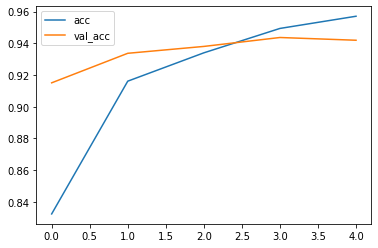

<Figure size 432x288 with 0 Axes>

In [11]:

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

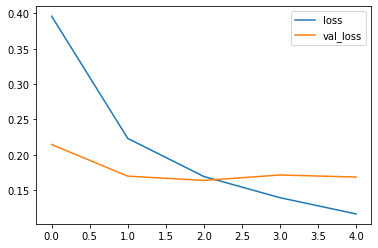

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

In [13]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])
    print(model.predict(tw).round().item()) 
    print(model.predict(tw))
    return model.predict(tw).round().item()
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)
test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  positive
0.0
[[0.26041907]]
Predicted label:  negative
1.0
[[0.9903382]]


1.0

In [14]:

# Opening JSON file
f1 = open('/content/drive/MyDrive/data.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f1)
f1.close()
print(data[0]['content'])

['The floods are happening only a month after torrential rains killed 435 people in the KwaZulu Natal province.', 'Heavy rains in South Africa have forced hundreds of people to flee their homes on the east coast, according to officials, only a month after the worst floods in living memory killed more than 400.', 'The floods over the weekend hit infrastructure, roads, bridges and damaged buildings, mainly in the port city of Durban, the capital of KwaZulu-Natal province and home to some 3.9 million people.', '“Some areas are inaccessible and have become islands at this stage,” KwaZulu-Natal Premier Sihle Zikalala said during a news conference on Sunday.', 'No fatalities were immediately recorded, but Zikalala added: “We are yet to receive a full comprehensive report on the impact of these latest heavy rains, but as reports come in a worrying picture is however emerging.”', 'In April, torrential rain led to floods, landslides and the death of 435 people in KwaZulu-Natal and authorities s

In [ ]:
# Example to find the average of the list
from statistics import mean
mappings = {}
for i in data:
  results_prediction = []
  print(i)
  for j in i['content']:
    results_prediction.append(predict_sentiment(j))
  print(results_prediction)
  mappings[i['title']] = mean(results_prediction)


In [21]:
def classify_sentiment(value2):
  if round(value2)>0.5:
    return "Negative"
  else:
    return "Positive"

In [31]:
print("                   Headlines                      --------    Polarity    -------  Sentiment")
for key in mappings:
  print(key +" ------- "+ str(mappings[key]) + " ------- "+ classify_sentiment(mappings[key]))

                   Headlines                      --------    Polarity    -------  Sentiment
Floods hit South Africa’s KwaZu­lu-Na­tal province again ------- 0.8888888888888888 ------- Negative
Mozam­bique: Cy­clone Gombe death toll ris­es to 53 ------- 0.8571428571428571 ------- Negative
Mozam­bique an­nounces new prime min­is­ter af­ter cab­i­net reshuf­fle ------- 0.6 ------- Negative
Analy­sis: Can African gas re­place Russ­ian sup­plies to Eu­rope? ------- 0.8222222222222222 ------- Negative
Dozens dead from Trop­i­cal Storm Ana in south­ern Africa ------- 0.55 ------- Negative
South­ern Africa bloc SADC ex­tends Mozam­bique mis­sion ------- 0.75 ------- Negative
In Mozam­bique, Kagame says Rwan­dan troops’ work not over ------- 0.868421052631579 ------- Negative
Rwan­da, Mozam­bique forces re­cap­ture port city from rebels ------- 0.875 ------- Negative
Rwan­da de­ploys 1,000 sol­diers to Mozam­bique’s Cabo Del­ga­do ------- 0.7222222222222222 ------- Negative
South­ern African n